In [64]:
#STEP 1
import pandas as pd


In [5]:
data = pd.read_csv('housing.csv')

In [7]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY

In [9]:
data.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  median_house_value  \
20635         845         330         1.5603               78100   
20636         356         114         2.5568               77100   
20637        1007         433         1.7000               92300   
20638         741         349         1.8672               84700   
20639        1387         530         2.3886               89400   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

In [11]:
print(f"Number of rows in the dataset: {len(data)}")


Number of rows in the dataset: 20640


In [13]:
print(f"Number of rows in the dataset: {len(data)}")


Number of rows in the dataset: 20640


In [15]:
print(f"Number of rows in the dataset: {len(data)}")

Number of rows in the dataset: 20640


In [16]:
stats = data.describe()

In [19]:
print("Descriptive Statistics:")
print(stats)


Descriptive Statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900

In [21]:
import matplotlib.pyplot as plt

In [80]:

def Visualize_stats(data):
    stats = data.describe().loc[['min', 'max', 'mean', '50%', 'std']].rename(index={'50%': 'median'})
    stats_t=stats.T
    plt.figure(figsize=(10, 6))
    stats_t.plot(kind='bar', colormap='viridis', alpha=0.80)
    plt.title('Descriptive Statistics')
    plt.xlabel('Stats')
    plt.ylabel('Value')
    plt.legend(title='Statistic')
    plt.tight_layout()
    plt.show()
 

<Figure size 1000x600 with 0 Axes>

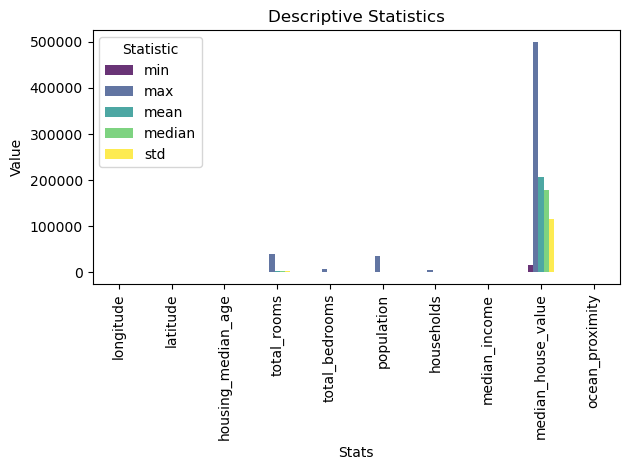

In [82]:
Visualize_stats(data)

In [24]:
#STEP 4
missing_values = data.isnull().sum()

In [25]:
print('Columns with Missing Values:')
print(missing_values)

Columns with Missing Values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [26]:
#STEP 4
print('Columns with Missing Values:')
print(missing_values[missing_values > 0])
#Here the missing value only provides total_bedrooms as all 
#other dataframes have 0 missing values

Columns with Missing Values:
total_bedrooms    207
dtype: int64


In [27]:
#STEP 5 and 6
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_distributions_before_after(data, columns, method):
    data_before = data.copy()
    # Impute missing values based on the selected method
   
    print("Columns with missing values before imputation:", columns)
    print("\n")
    print("Each column's number of missing values:")
    print(data_before.isnull().sum())
    print("\n")
    
    if method == 'mean':
        for column in columns:
            if data[column].isnull().any():
                mean_value = data[column].mean()
                data[column] = data[column].fillna(mean_value)
                print(f"Filled missing values in {column} with mean: {mean_value}")
    elif method == 'median':
        for column in columns:
            if data[column].isnull().any():
                median_value = data[column].median()
                data[column] = data[column].fillna(median_value)
                print(f"Filled missing values in {column} with median: {median_value}")
    elif method == 'mode':
        for column in columns:
            if data[column].isnull().any():
                mode_value = data[column].mode()[0]
                data[column] = data[column].fillna(mode_value)
                print(f"Filled missing values in {column} with mode: {mode_value}")
    else:
        print("Invalid method. Please choose 'mean', 'median', or 'mode'.")
        return
    print("Each column's number of missing values after imputation:")
    print(data.isnull().sum())        
    
    for column in columns:
        plt.figure(figsize=(20, 15))

        # Plot before imputation
        plt.subplot(3, 2, 1)
        sns.boxplot(y=data_before[column], color='blue')
        plt.title(f'{column} Distribution Before Imputation')
        plt.xlabel("Index")
        plt.ylabel('Total Bedrooms')
        plt.grid(True)

        # Plot after imputation
        plt.subplot(3, 2, 2)
        sns.boxplot(y=data[column], color='green')
        plt.title(f'{column} Distribution after imputation')
        plt.xlabel('Index')
        plt.ylabel('Total Bedrooms')
        plt.grid(True)



        # Plot before imputation
        plt.subplot(3, 2, 3)
        sns.scatterplot(x=data.index,y=data_before[column], color='blue')
        plt.title(f'{column} Distribution Before Imputation')
        plt.xlabel("Index")
        plt.ylabel('Total Bedrooms')
        plt.grid(True)
        

        # Plot after imputation
        plt.subplot(3, 2, 4)
        sns.scatterplot(x=data.index, y=data[column], color='green')
        plt.title(f'{column} Distribution after imputation')
        plt.xlabel('Index')
        plt.ylabel('Total Bedrooms')
        plt.grid(True)

        #plot before imputation
        plt.subplot(3,2,5)
        sns.lineplot(x=data.index, y=data_before[column], color='blue')
        plt.title(f'{column} Distribution before imputation')
        plt.xlabel('Index')
        plt.ylabel('Total Bedrooms')
        plt.grid(True)

        #plot after imputation
        plt.subplot(3,2,6)
        sns.lineplot(x=data.index, y=data[column], color='green')
        plt.title(f'{column} Distribution after imputation')
        plt.xlabel('Index')
        plt.ylabel('Total Bedrooms')
        plt.grid(True)

        
        plt.tight_layout()
        plt.show()
        
data = pd.read_csv('housing.csv')
missing_columns_before = data.columns[data.isnull().any()]
# Imputation and plotting
plot_distributions_before_after(data, missing_columns_before, method='median')

# Checking missing values after imputation




Columns with missing values before imputation: Index(['total_bedrooms'], dtype='object')


Each column's number of missing values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Filled missing values in total_bedrooms with median: 435.0
Each column's number of missing values after imputation:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [28]:
#STEP 7
stats=data.describe()
print(stats)
data_remove_duplicates=data.drop_duplicates()
stats_remove_duplicates=data_remove_duplicates.describe()
print(stats_remove_duplicates)


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838857   1425.476744    499.539680       3.870671   
std        419.391878   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

In [29]:
#STEP 8

plt.figure(figsize=(8, 6))
# Label axes
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a title
plt.title('California Housing Prices: Longitude vs Latitude')


# Create scatter plot
sc = plt.scatter(data['longitude'], data['latitude'], 
                 c=data['median_house_value'], cmap='viridis', alpha=0.4)

# Adding a colorbar to interpret the colors
cbar = plt.colorbar(sc)
cbar.set_label('Median House Value ($)', rotation=270, labelpad=30)
plt.show()


Number of houses with total_bedrooms less than 1500: (19986, 10)
Number of houses with median_income greater than 10: (308, 10)
Number of houses with housing_median_age greater than 30: (9495, 10)
Number of houses with population greater than 1000: (12483, 10)
Number of houses with households less than 50: (330, 10)
Number of houses with median_house_value greater than $500,000: (965, 10)


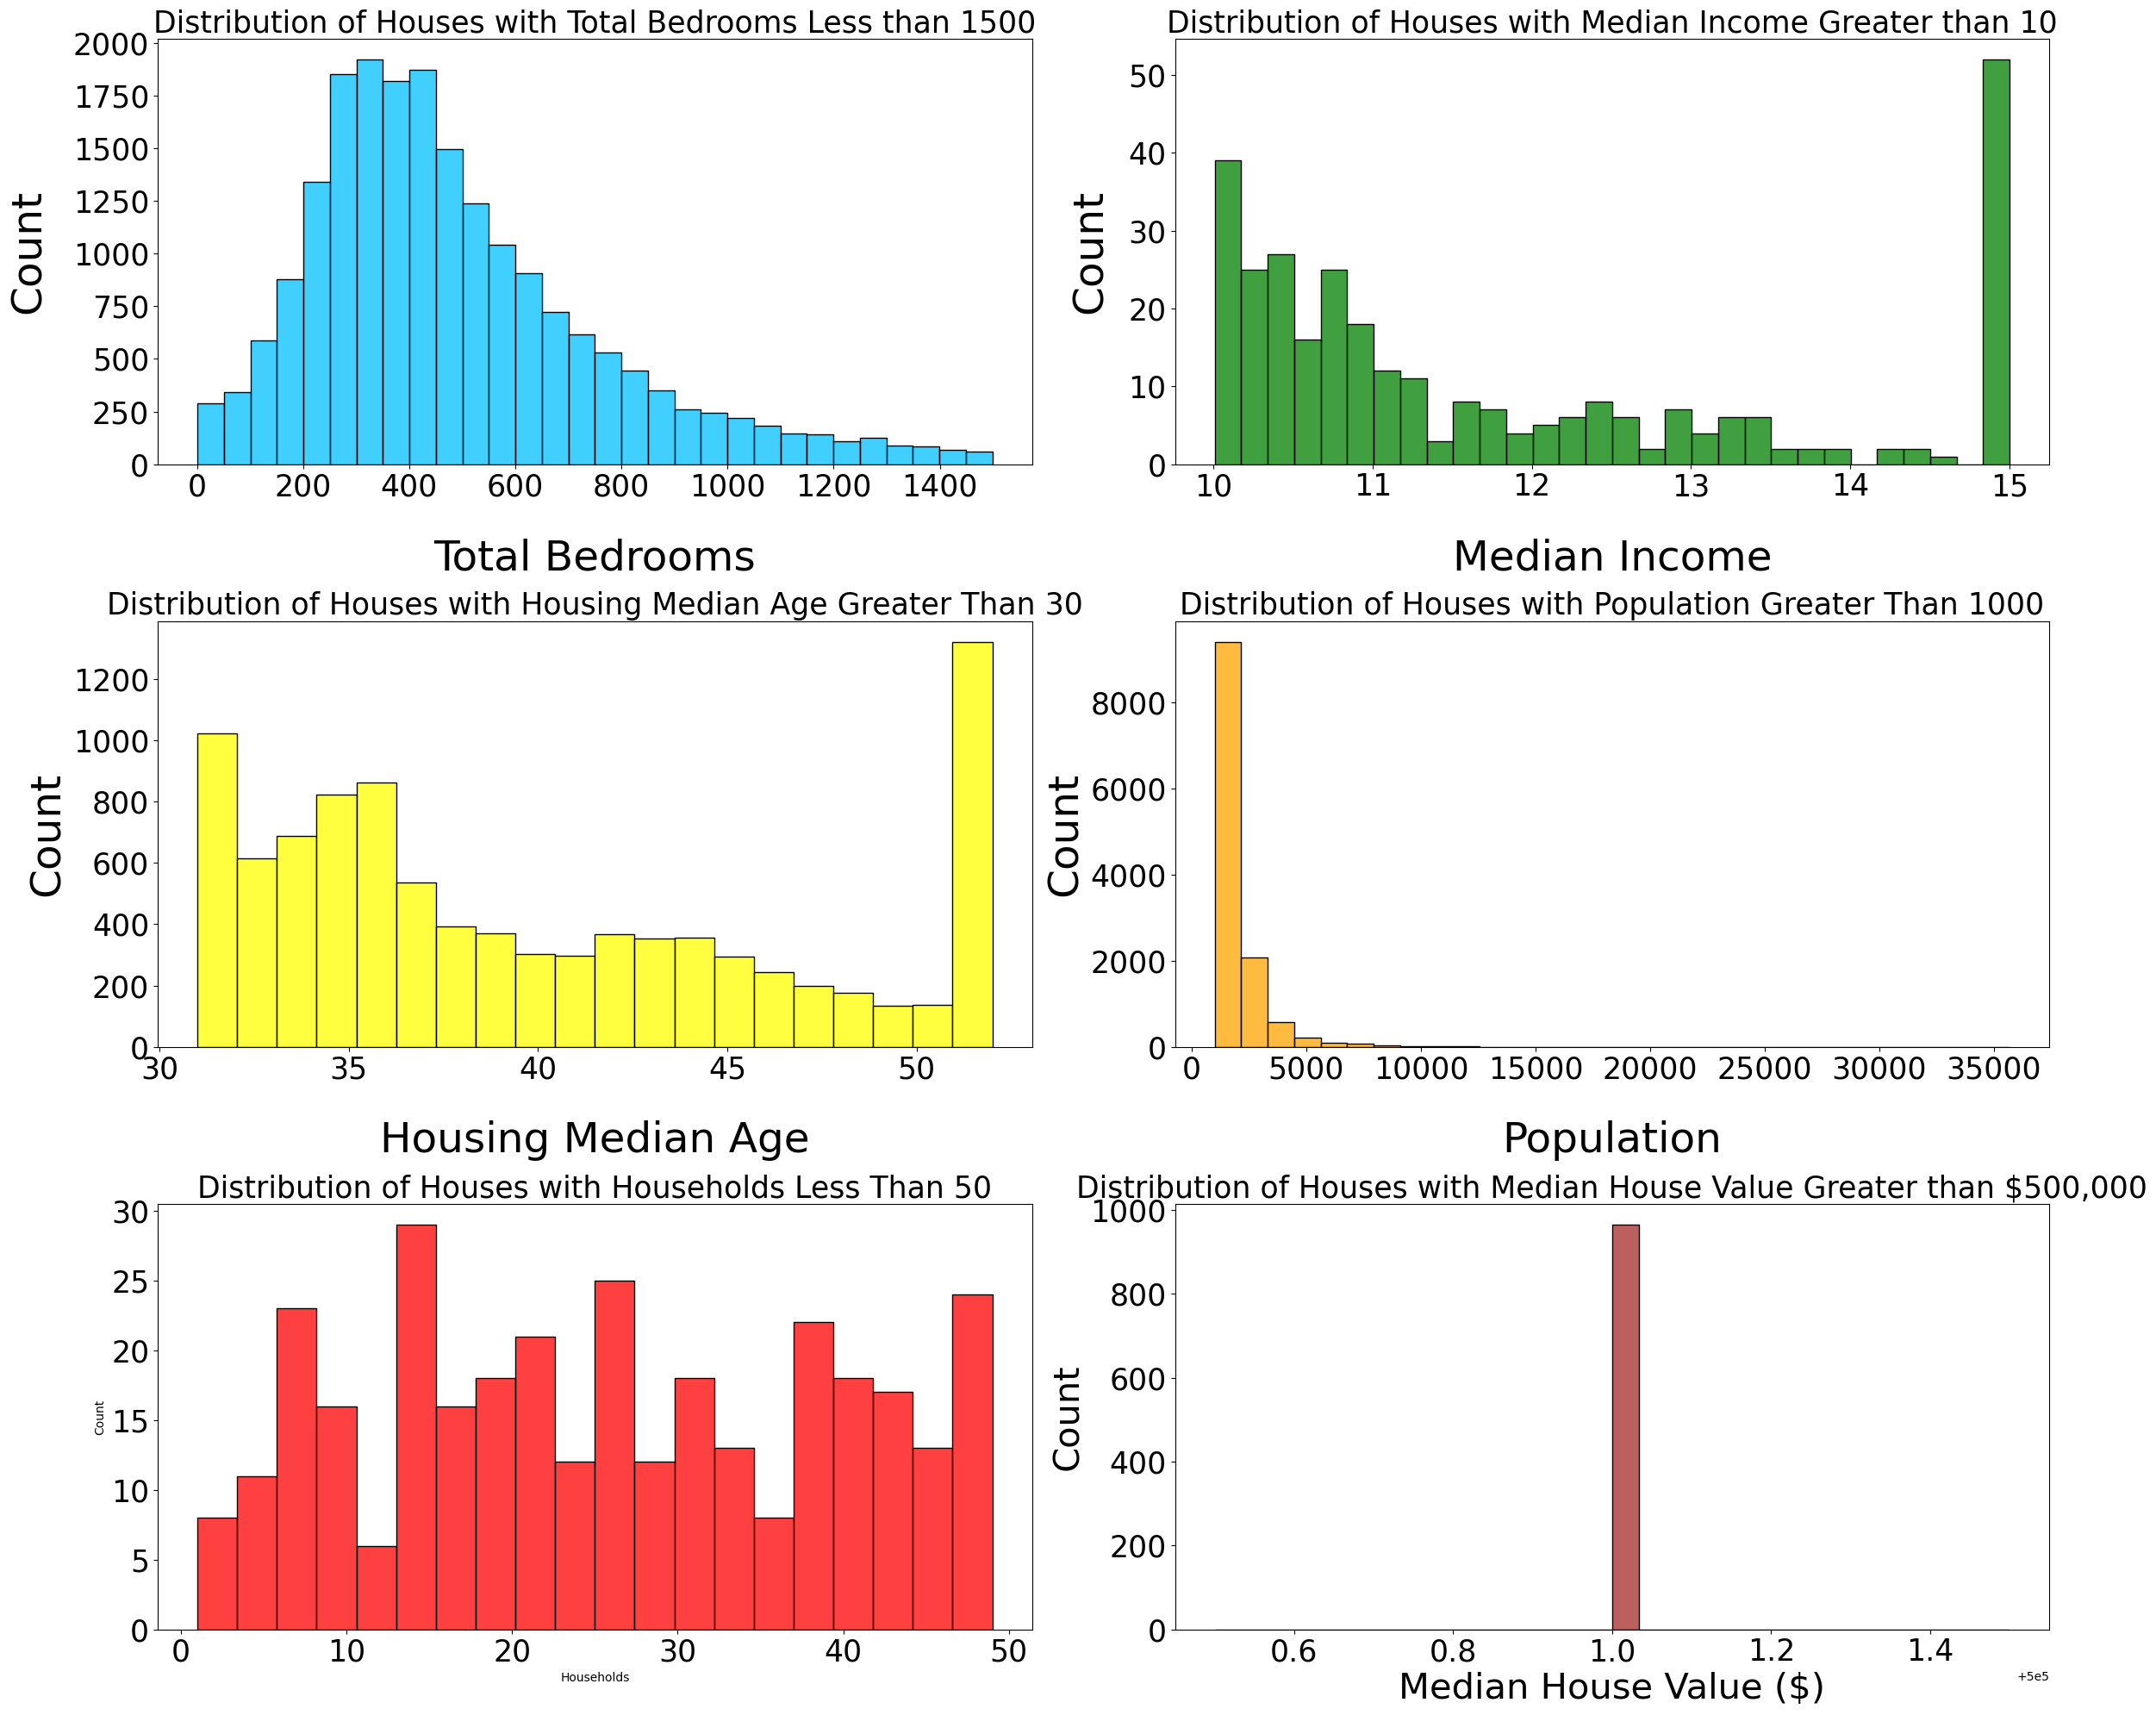

In [30]:
#STEP9 
#1 Number of bedrooms less than 1500 


#1Count the number of houses with total_bedrooms less than 1500
bedrooms_less_than_1500 = data[data['total_bedrooms'] < 1500].shape
print(f"Number of houses with total_bedrooms less than 1500: {bedrooms_less_than_1500}")

# Visualize the distribution of houses with total_bedrooms less than 1500
plt.figure(figsize=(24, 20))
plt.subplot(3,2,1)
sns.histplot(data[data['total_bedrooms'] < 1500]['total_bedrooms'],bins=30, color='deepskyblue')
plt.title('Distribution of Houses with Total Bedrooms Less than 1500',fontsize=25)
plt.xlabel('Total Bedrooms',fontsize=35,labelpad=30)
plt.ylabel('Count',fontsize=35,labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

#2 Count the number of houses with median_income greater than 10
plt.subplot(3,2,2)
high_income_houses = data[data['median_income'] > 10].shape
print(f"Number of houses with median_income greater than 10: {high_income_houses}")
sns.histplot(data[data['median_income'] > 10]['median_income'], bins=30, color='green')
plt.title('Distribution of Houses with Median Income Greater than 10',fontsize=25)
plt.xlabel('Median Income',fontsize=35,labelpad=30)
plt.ylabel('Count',fontsize=35,labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

#3 Count the number of houses with housing_median_age greater than 30
plt.subplot(3,2,3)
old_houses = data[data['housing_median_age'] > 30].shape
print(f"Number of houses with housing_median_age greater than 30: {old_houses}")
sns.histplot(data[data['housing_median_age'] > 30]['housing_median_age'], bins=20, color='yellow')
plt.title('Distribution of Houses with Housing Median Age Greater Than 30',fontsize=25)
plt.xlabel('Housing Median Age',fontsize=35,labelpad=30)
plt.ylabel('Count',fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

#4 Count the number of houses with population greater than 1000
plt.subplot(3,2,4)
high_population = data[data['population'] > 1000].shape
print(f"Number of houses with population greater than 1000: {high_population}")
sns.histplot(data[data['population'] > 1000]['population'], bins=30, color='orange')
plt.title('Distribution of Houses with Population Greater Than 1000',fontsize=25)
plt.xlabel('Population',fontsize=35,labelpad=30)
plt.ylabel('Count',fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


#5 Count the number of houses with households less than 50
plt.subplot(3,2,5)
few_households = data[data['households'] < 50].shape
print(f"Number of houses with households less than 50: {few_households}")
sns.histplot(data[data['households'] < 50]['households'], bins=20,color='red')
plt.title('Distribution of Houses with Households Less Than 50',fontsize=25)
plt.xlabel('Households')
plt.ylabel('Count')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

#6 Houses with median house value greater than 500000$
plt.subplot(3,2,6)
high_value_houses = data[data['median_house_value'] > 500000]
print(f"Number of houses with median_house_value greater than $500,000: {high_value_houses.shape}")
sns.histplot(high_value_houses['median_house_value'], bins=30, color='brown')
plt.title('Distribution of Houses with Median House Value Greater than $500,000',fontsize=25)
plt.xlabel('Median House Value ($)',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)



plt.tight_layout()
plt.show()




In [31]:
#STEP 10 part a
# Group by 'ocean_proximity' and calculate summary statistics for numerical features
grouped = data.groupby('ocean_proximity').agg({
    'housing_median_age': ['mean', 'median', 'std'],
    'total_rooms': ['mean', 'median', 'std'],
    'total_bedrooms': ['mean', 'median', 'std'],
    'population': ['mean', 'median', 'std'],
    'households': ['mean', 'median', 'std'],
    'median_income': ['mean', 'median', 'std'],
    'median_house_value': ['mean', 'median', 'std']
})

print(grouped)


                housing_median_age                    total_rooms          \
                              mean median        std         mean  median   
ocean_proximity                                                             
<1H OCEAN                29.279225   30.0  11.644453  2628.343586  2108.0   
INLAND                   24.271867   23.0  12.018020  2717.742787  2131.0   
ISLAND                   42.400000   52.0  13.164346  1574.600000  1675.0   
NEAR BAY                 37.730131   39.0  13.070385  2493.589520  2083.0   
NEAR OCEAN               29.347254   29.0  11.840371  2583.700903  2195.0   

                             total_bedrooms                      population  \
                         std           mean median         std         mean   
ocean_proximity                                                               
<1H OCEAN        2160.463696     545.293892  435.0  425.677092  1520.290499   
INLAND           2385.831111     533.051443  426.0  444.332437  139

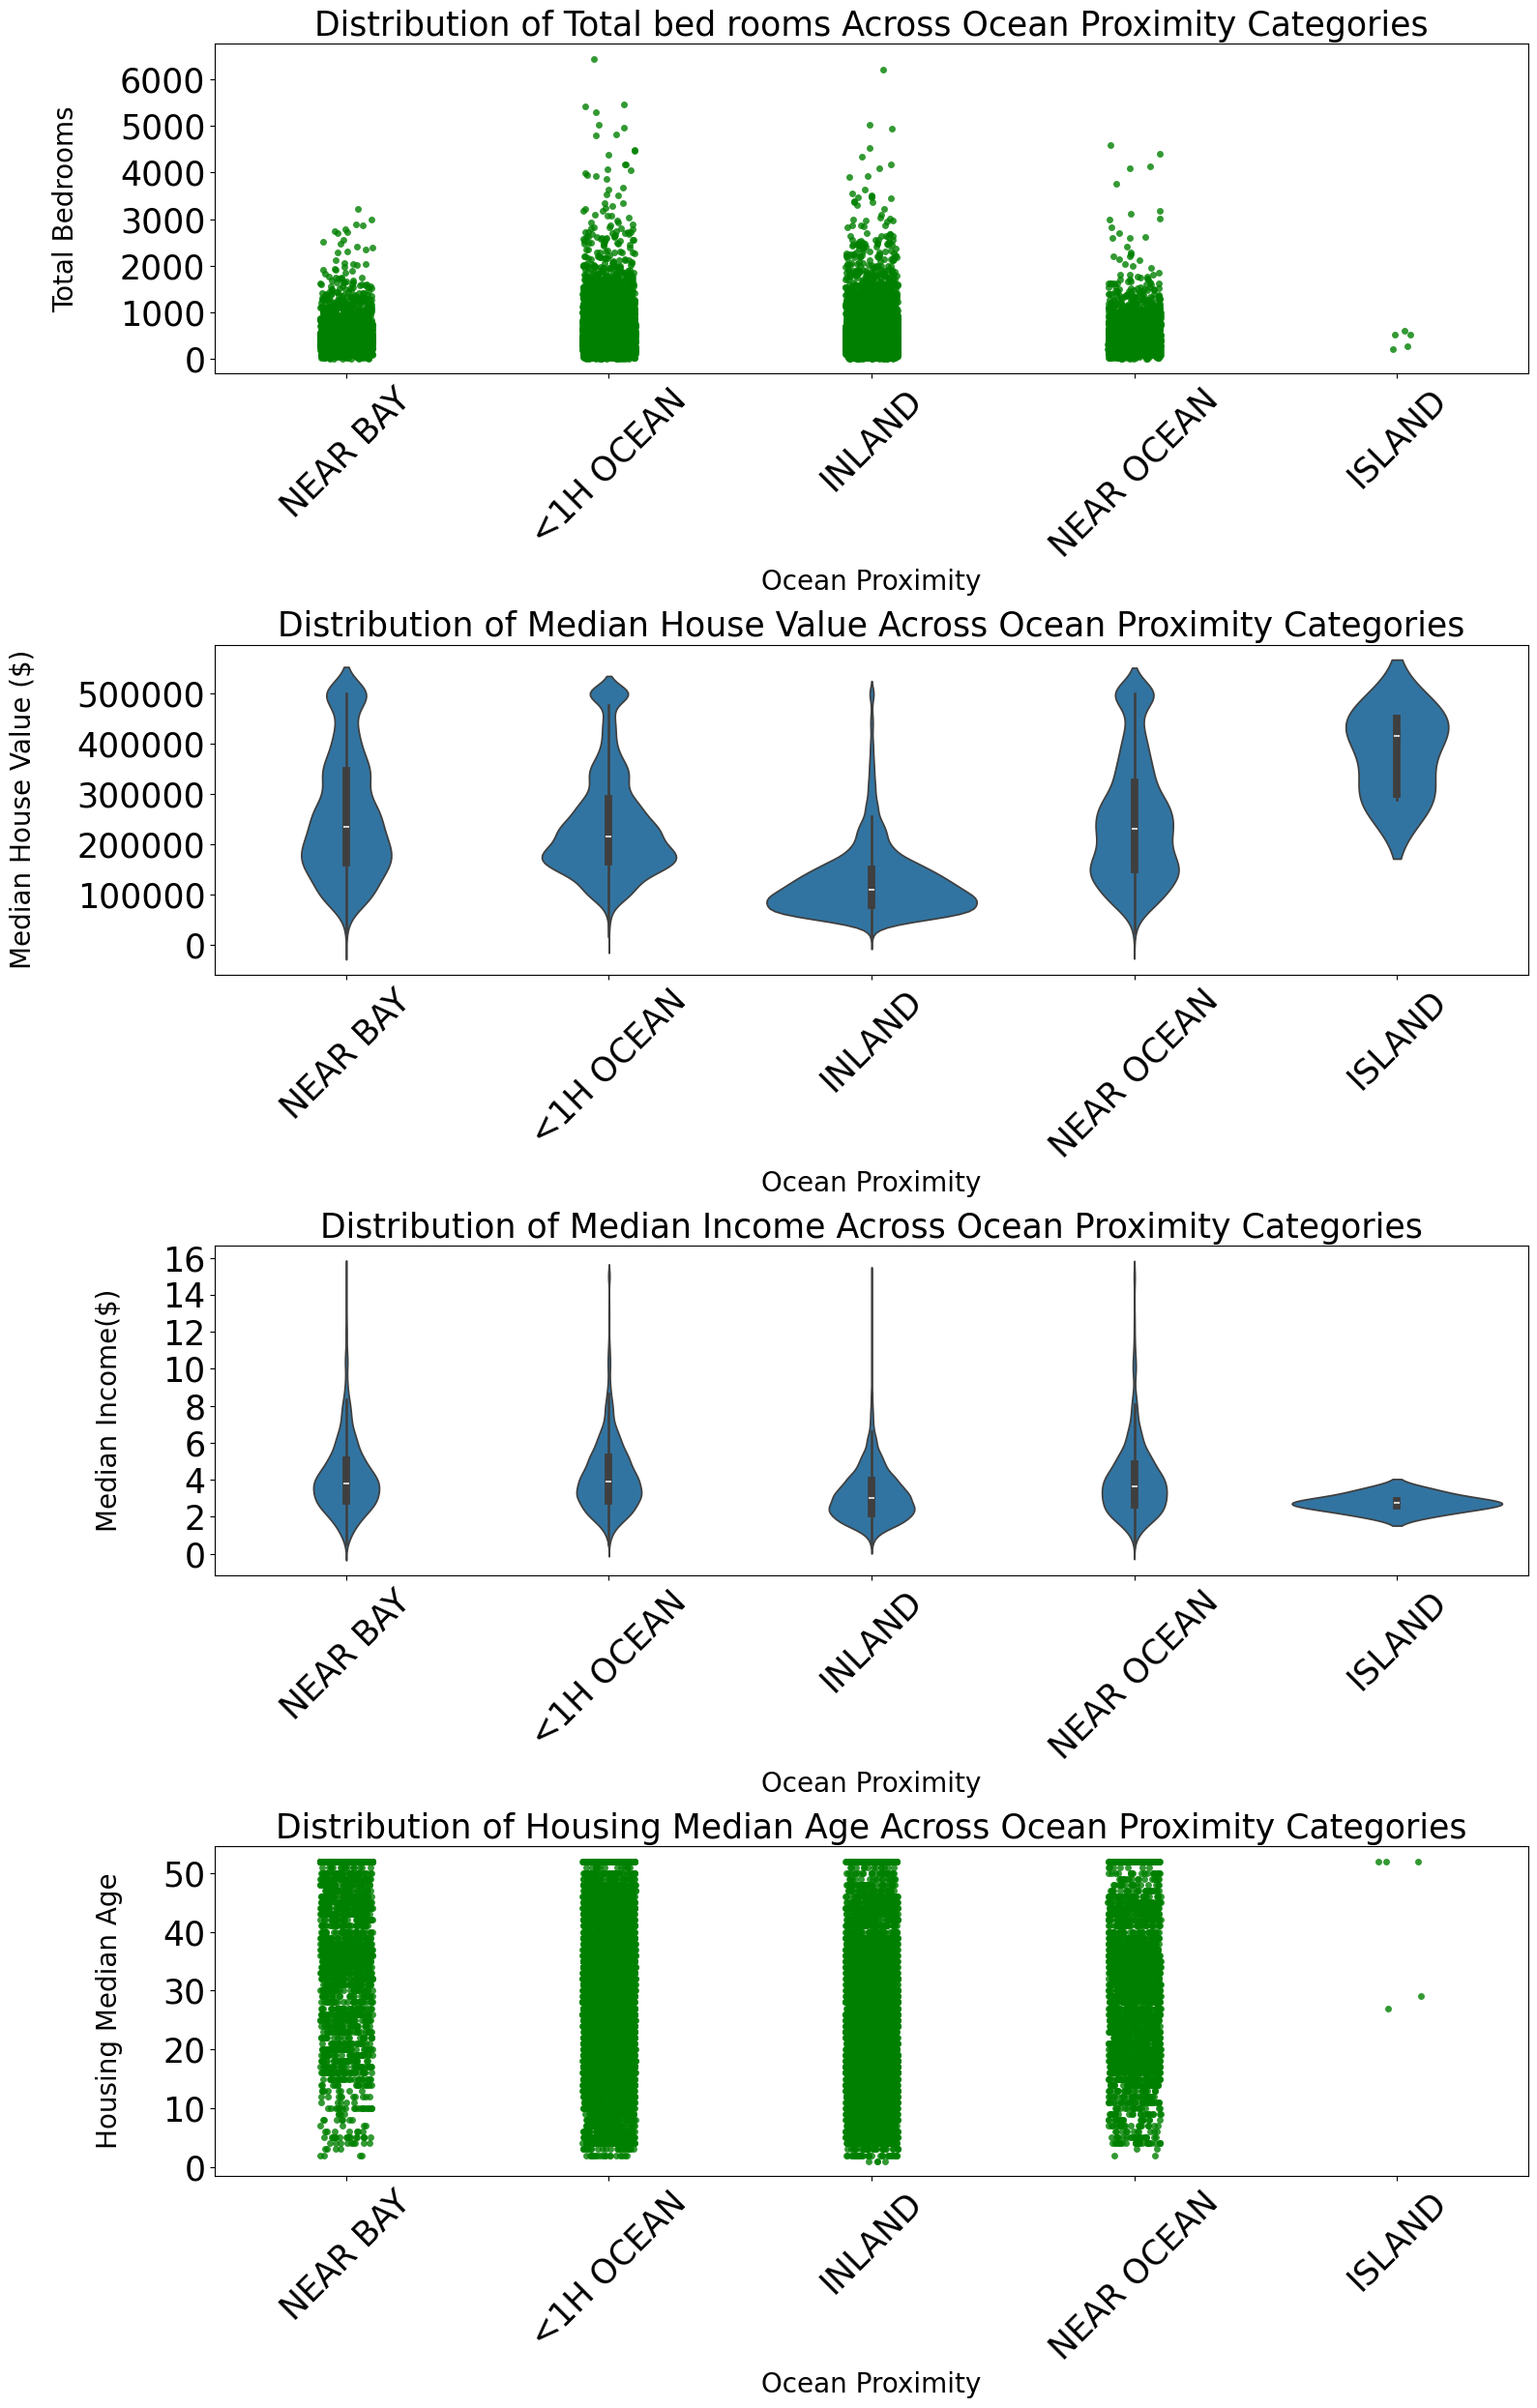

In [43]:
#STEP10 part b
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('housing.csv')
# Plot the distribution of median house value across ocean proximity categories
plt.figure(figsize=(16, 25))
plt.subplot(4,1,1)
# Calculate mean median house value for each ocean proximity category)

sns.stripplot(x='ocean_proximity', y='total_bedrooms', data=data,alpha=0.8,color='green')
plt.title('Distribution of Total bed rooms Across Ocean Proximity Categories',fontsize=25)
plt.xlabel('Ocean Proximity',fontsize=20)
plt.ylabel('Total Bedrooms',fontsize=20,labelpad=30)
plt.xticks(rotation=45)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Plot the distribution of median house value across ocean proximity categories
plt.subplot(4,1,2)
sns.violinplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title('Distribution of Median House Value Across Ocean Proximity Categories',fontsize=25)
plt.xlabel('Ocean Proximity',fontsize=20)
plt.ylabel('Median House Value ($)',fontsize=20,labelpad=30)
plt.xticks(rotation=45)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Plot the distribution of median house value across ocean proximity categories
plt.subplot(4,1,3)
sns.violinplot(x='ocean_proximity', y='median_income', data=data)
plt.title('Distribution of Median Income Across Ocean Proximity Categories',fontsize=25)
plt.xlabel('Ocean Proximity',fontsize=20)
plt.ylabel('Median Income($)',fontsize=20,labelpad=30)
plt.xticks(rotation=45)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.subplot(4,1,4)
sns.stripplot(x='ocean_proximity', y='housing_median_age', data=data,alpha=0.8,color='green')
plt.title('Distribution of Housing Median Age Across Ocean Proximity Categories',fontsize=25)
plt.xlabel('Ocean Proximity',fontsize=20)
plt.ylabel('Housing Median Age',fontsize=20,labelpad=30)
plt.xticks(rotation=45)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


plt.tight_layout()
plt.show()




In [44]:
#STEP10 part c
from sklearn.preprocessing import LabelEncoder

# Initialize and fit LabelEncoder
label_encoder = LabelEncoder()
data['ocean_proximity_encoded'] = label_encoder.fit_transform(data['ocean_proximity'])

# Display the first few rows with the encoded column
print(data[['ocean_proximity', 'ocean_proximity_encoded']])


      ocean_proximity  ocean_proximity_encoded
0            NEAR BAY                        3
1            NEAR BAY                        3
2            NEAR BAY                        3
3            NEAR BAY                        3
4            NEAR BAY                        3
...               ...                      ...
20635          INLAND                        1
20636          INLAND                        1
20637          INLAND                        1
20638          INLAND                        1
20639          INLAND                        1

[20640 rows x 2 columns]


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, 'longitude'),
  Text(0, 1.5, 'latitude'),
  Text(0, 2.5, 'housing_median_age'),
  Text(0, 3.5, 'total_rooms'),
  Text(0, 4.5, 'total_bedrooms'),
  Text(0, 5.5, 'population'),
  Text(0, 6.5, 'households'),
  Text(0, 7.5, 'median_income'),
  Text(0, 8.5, 'median_house_value'),
  Text(0, 9.5, 'ocean_proximity_encoded')])

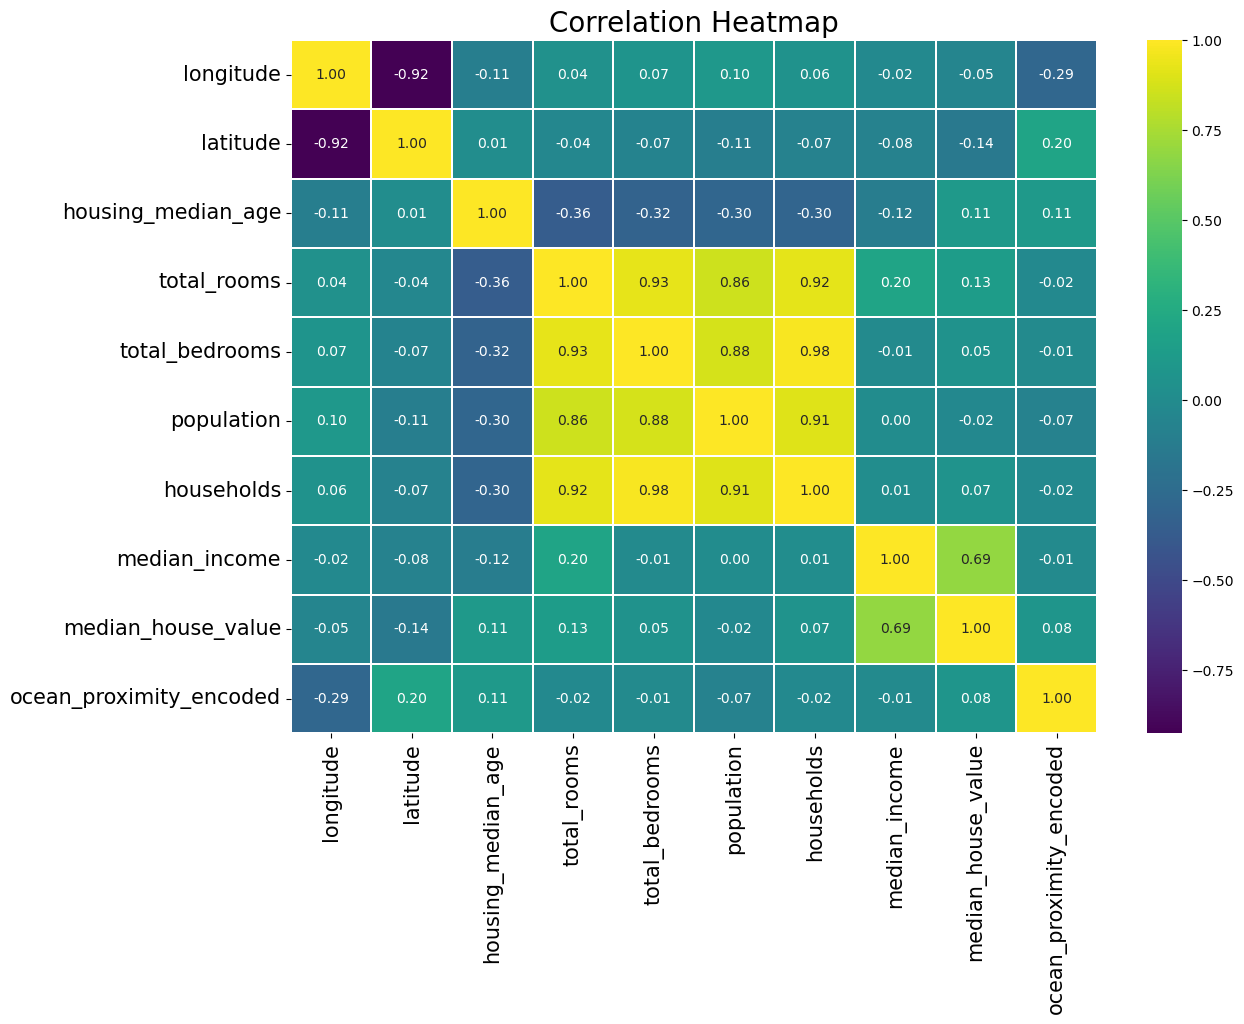

In [45]:
#STEP11 part a
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Create a heatmap
plt.figure(figsize=(13, 9))
sns.heatmap(numerical_data.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=0.1)
plt.title('Correlation Heatmap',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)





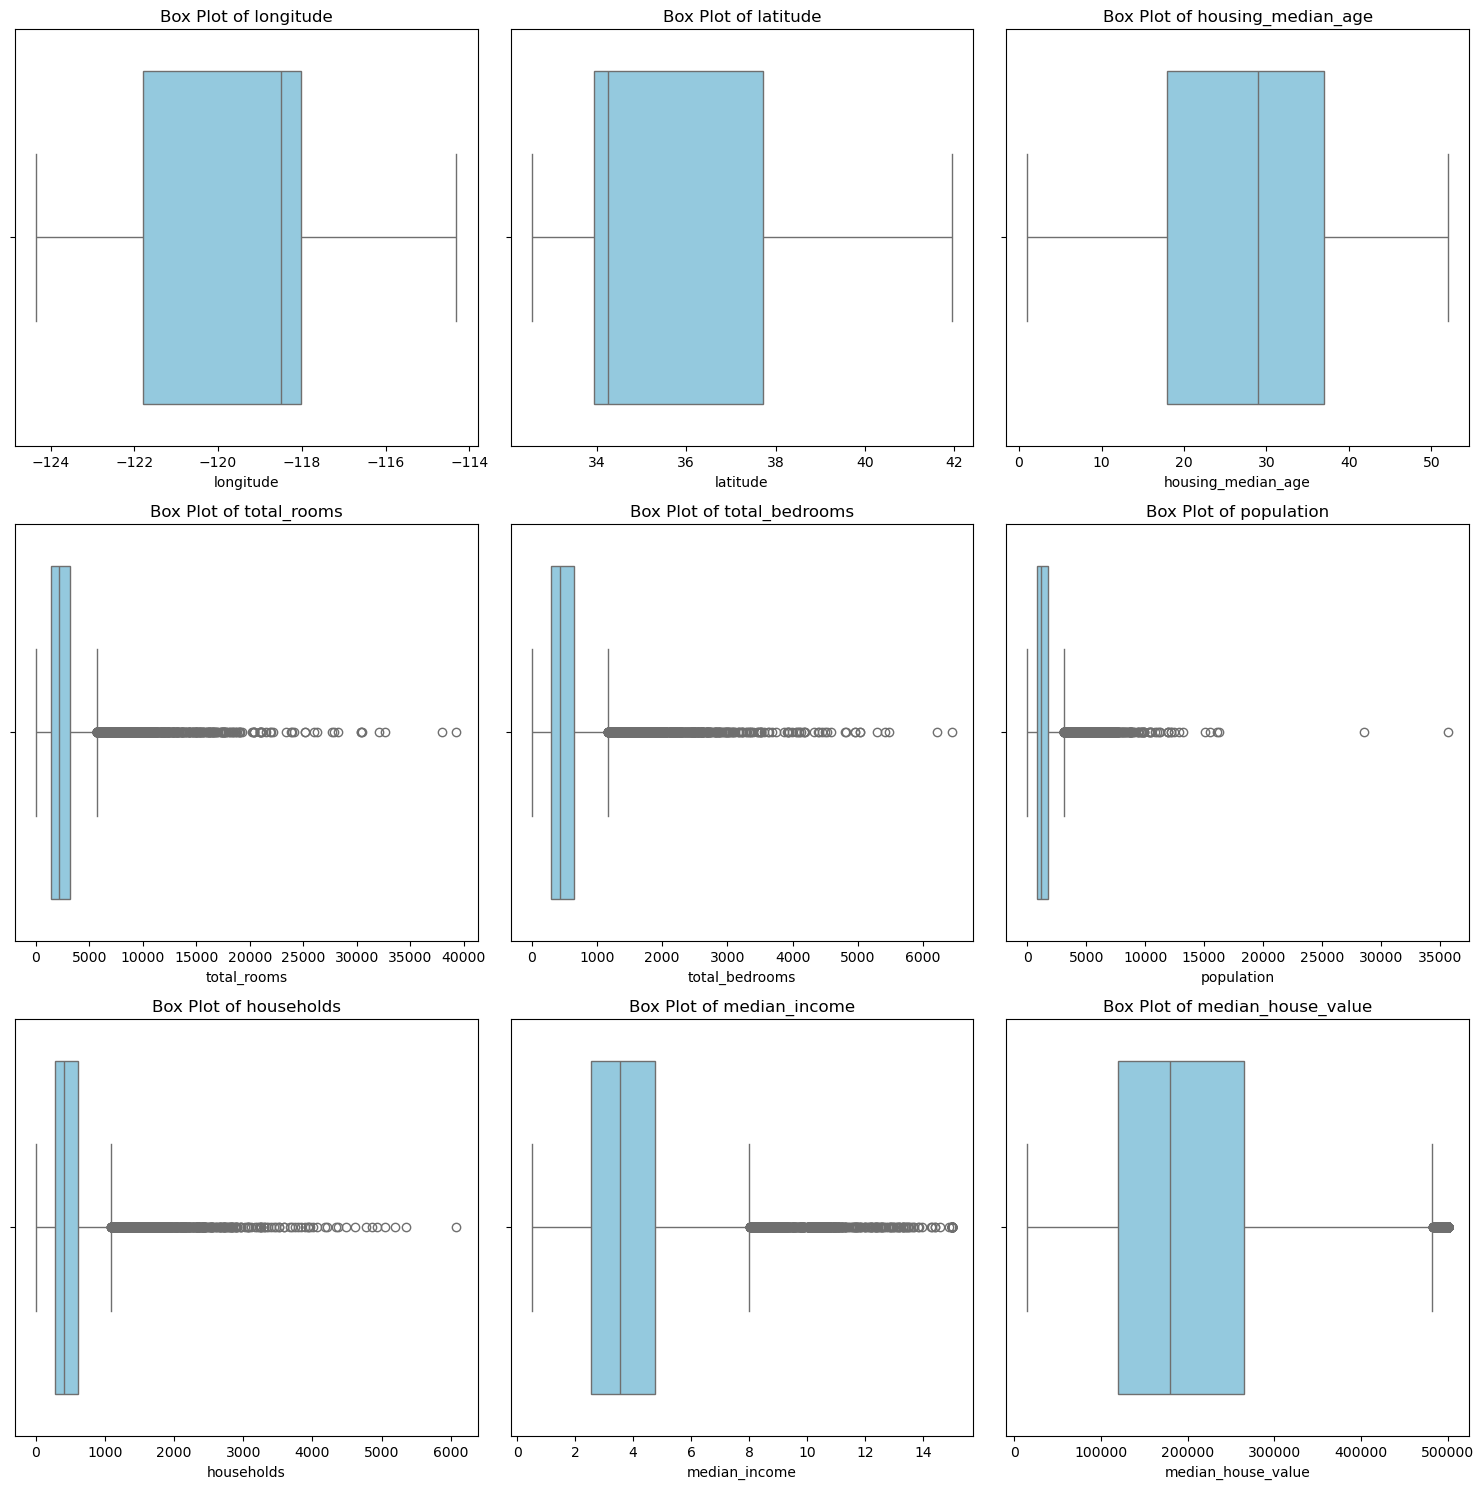

In [46]:
#STEP11 part b
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# List of numerical features
data=pd.read_csv('housing.csv')
numerical_features=data.select_dtypes(include=['number'])
# or u can write like below raw code
# numerical_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

plt.figure(figsize=(15, 15))

# Create a box plot for each numerical feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[feature], color='skyblue')
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


In [51]:
#STEP11 part c
#part c i
#strong relation coefficient between features exists when corr coefficient 
#close to -1 or +`1 
#There is a strong coefficient relationship in the center of the box plot 
#which is in yellow color ; we can see that total bedroom and households 
#has the maximum then coming is the  total bedrooms and total rooms 


#part c ii
# we can see outliers in the boxplots of total rooms, median_income,
#median_house_value,households,median_income,median_house_value .

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.]),
 [Text(0, -100000.0, '−100000'),
  Text(0, 0.0, '0'),
  Text(0, 100000.0, '100000'),
  Text(0, 200000.0, '200000'),
  Text(0, 300000.0, '300000'),
  Text(0, 400000.0, '400000'),
  Text(0, 500000.0, '500000'),
  Text(0, 600000.0, '600000')])

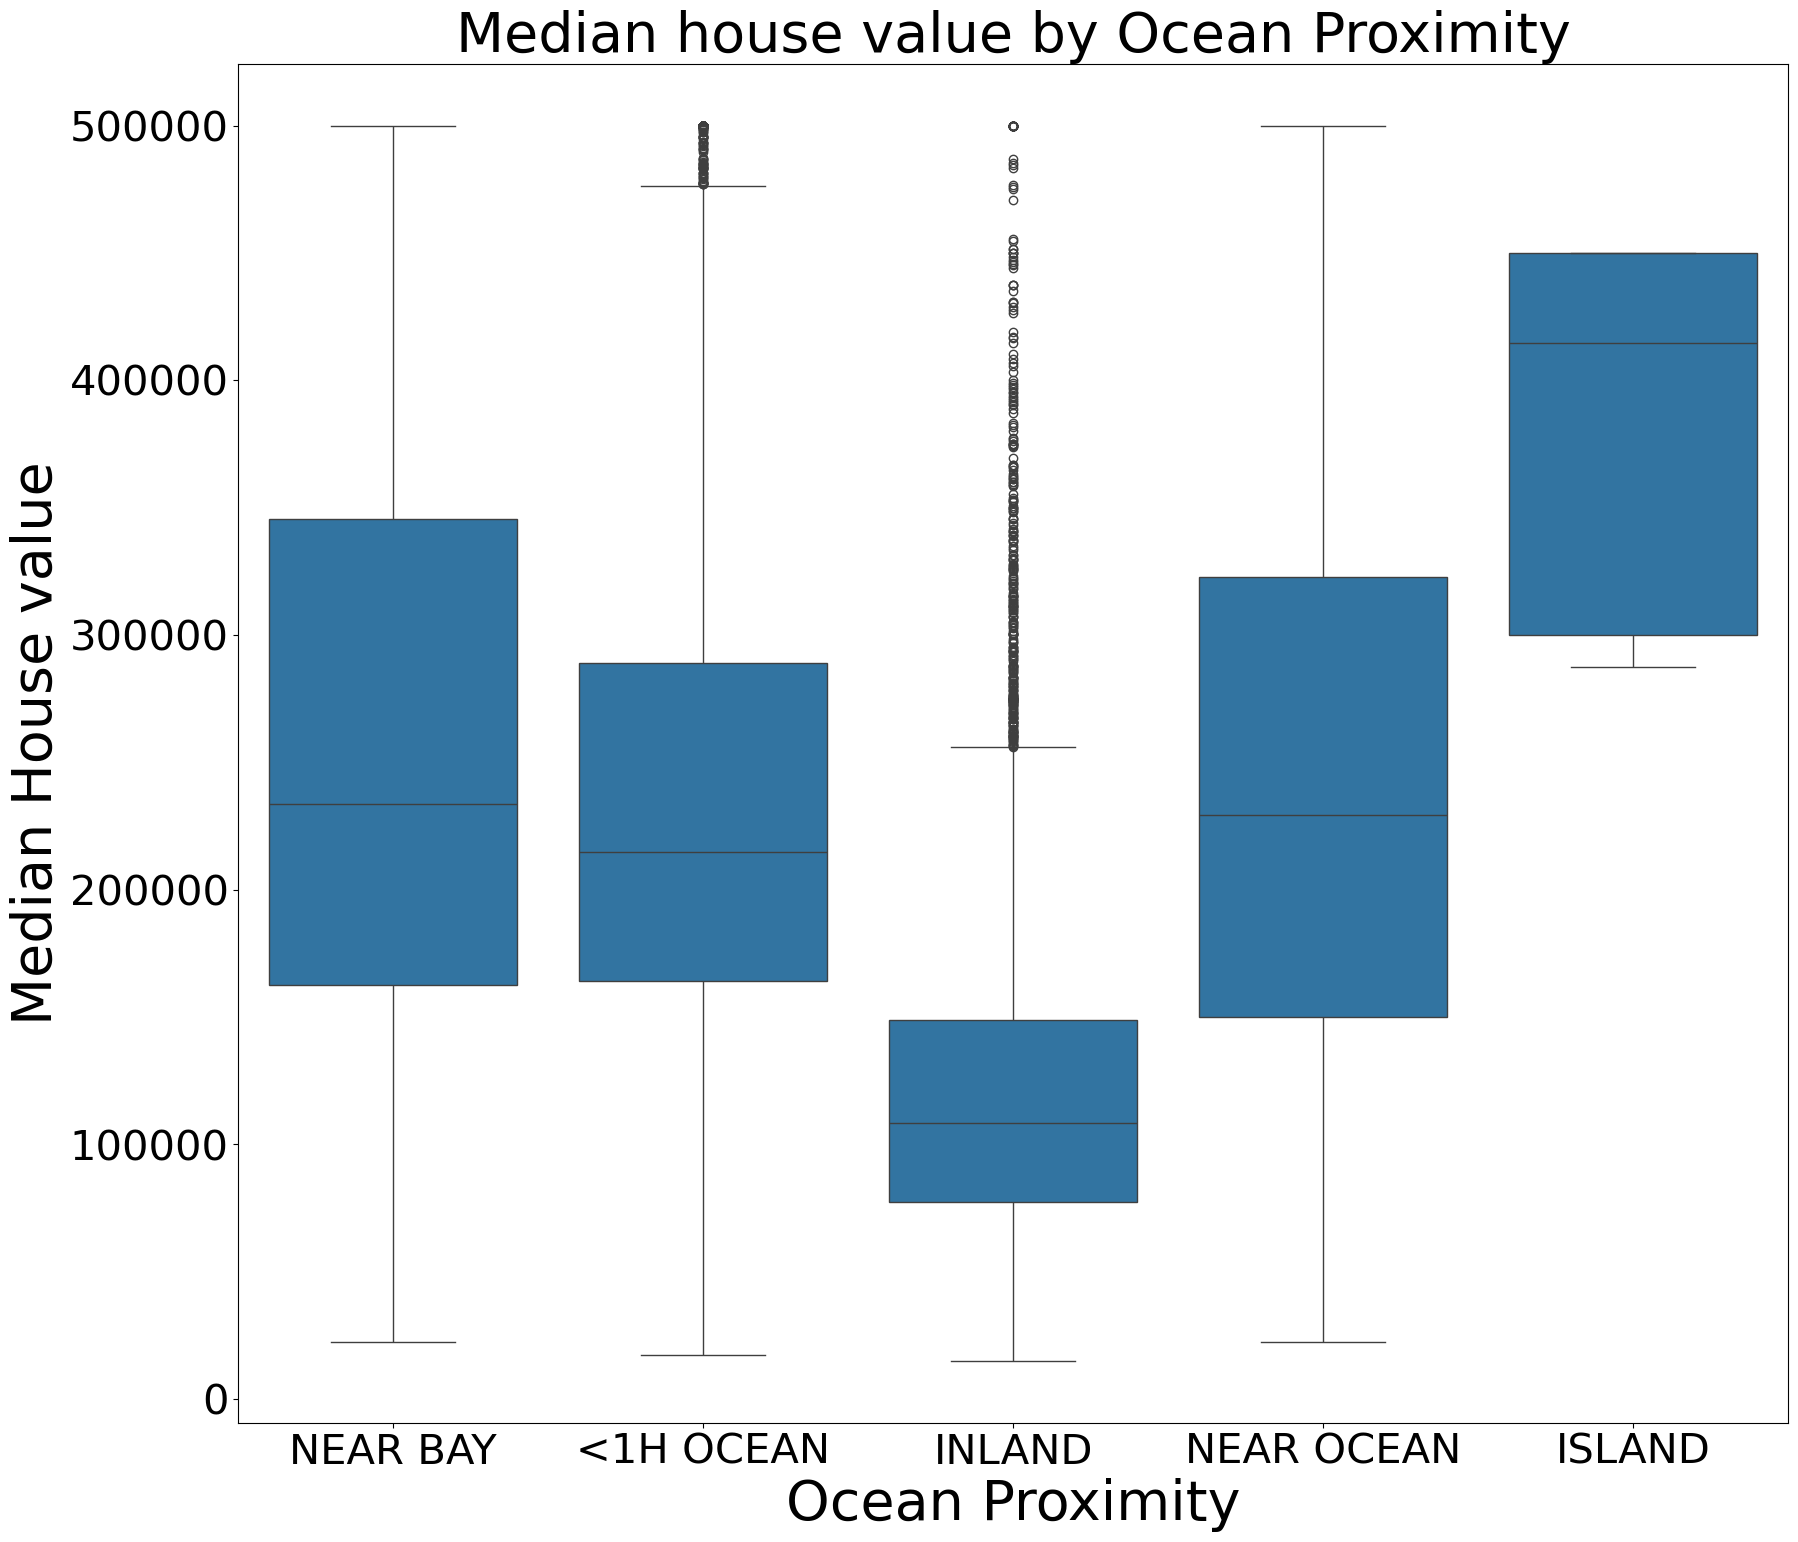

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set up the matplotlib figure
data=pd.read_csv('housing.csv')
plt.figure(figsize=(20, 60))
# Plot 1: Cost per Square Foot by Ocean Proximity
plt.subplot(3,1, 1)
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title('Median house value by Ocean Proximity',fontsize=40)
plt.ylabel('Median House value',fontsize=40)
plt.xlabel('Ocean Proximity',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv('housing.csv')
def visualize_column_distribution(data, column):
    """
    Visualizes the distribution and relationship of a specified numerical column within a dataset.
    
    Parameters:
    - data (pd.DataFrame): The dataset containing the numerical column.
    - column (str): The name of the numerical column to visualize.
    """
    plt.figure(figsize=(12, 8))
    
    # Kernel Density Estimate (KDE) Plot
    plt.subplot(3, 1, 1)
    sns.kdeplot(data[column], fill=True, color='blue')
    plt.title(f'KDE of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    
    # Boxplot
    plt.subplot(3, 1, 2)
    sns.boxplot(x=data[column], color='lightblue')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
    # Scatterplot with median_house_value
    plt.subplot(3, 1, 3)
    sns.scatterplot(x=data[column], y=data['median_house_value'], color='orange', alpha=0.6)
    plt.title(f'{column} vs Median House Value')
    plt.xlabel(column)
    plt.ylabel('Median House Value ($)')
    
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming 'data' is your DataFrame and you want to visualize the 'total_rooms' column
visualize_column_distribution(data, 'total_bedrooms')


Number of outliers: 808


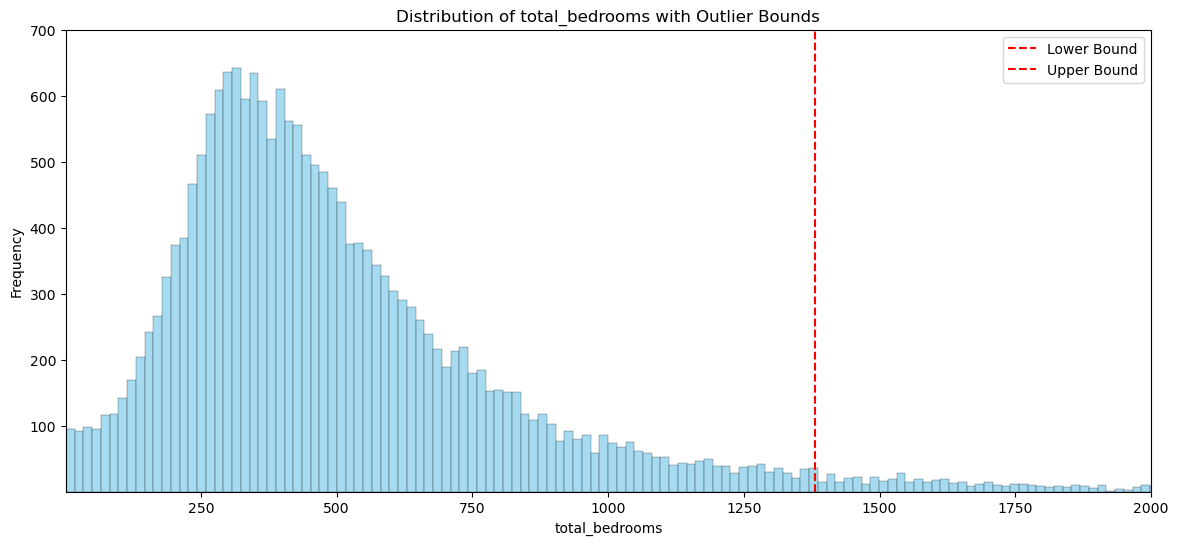

In [57]:
#STEP13 Didnt get the exact result but somewhat around it 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def identify_and_visualize_outliers(data, column):
    # Calculate mean and standard deviation
    mean = data[column].mean()
    std_dev = data[column].std()

    # Calculate bounds for 95% of the data
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev

    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    num_outliers = outliers.shape[0]

    # Print the number of outliers
    print(f"Number of outliers: {num_outliers}")

    # Create plots
    plt.figure(figsize=(14, 6))

    sns.histplot(data[column], kde=False, color='skyblue', edgecolor='black',bins=400)
    plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
    plt.title(f'Distribution of {column} with Outlier Bounds')
    plt.xlabel(column)
    plt.ylabel('Frequency')
   # plt.xlim(1, 5000)  # x-axis from 2 to 4
    #plt.ylim(1,550) 
    plt.xlim(1,2000)
    plt.ylim(1,700)# y-axis from 4 to 8
    plt.legend()


# Example usage
# Replace 'your_column_name' with the actual column name in your DataFrame
identify_and_visualize_outliers(data, 'total_bedrooms')


In [59]:
print(data.dtypes)


longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object


In [61]:
#STEP 14
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder
# Select numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns
x = data[numerical_cols].values

# Example: Encoding categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
# Initialize scalers
mm_scaler = MinMaxScaler()
s_scaler = StandardScaler()

# Apply scalers to numerical data
x_mm = mm_scaler.fit_transform(x)
x_s = s_scaler.fit_transform(x)

# Convert to DataFrames for easier analysis
x_mm_df = pd.DataFrame(x_mm, columns=numerical_cols)
x_s_df = pd.DataFrame(x_s, columns=numerical_cols)

# Print ranges for MinMaxScaler
print("MinMaxScaler Ranges:")
print(x_mm_df.describe().loc[['min', 'max']])

# Print ranges for StandardScaler
print("\nStandardScaler Ranges:")
print(x_s_df.describe().loc[['min', 'max']])


MinMaxScaler Ranges:
     longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
min        0.0       0.0                 0.0          0.0             0.0   
max        1.0       1.0                 1.0          1.0             1.0   

     population  households  median_income  median_house_value  
min         0.0         0.0            0.0                 0.0  
max         1.0         1.0            1.0                 1.0  

StandardScaler Ranges:
     longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
min  -2.385992 -1.447568           -2.196180    -1.207283       -1.274093   
max   2.625280  2.958068            1.856182    16.815580       14.018707   

     population  households  median_income  median_house_value  
min   -1.256123   -1.303984      -1.774299           -1.662641  
max   30.250330   14.601520       5.858286            2.540411  
